##  I.CHARGEMENT DU DATASET

**importation des librairies necessaires**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_table("heart_1.txt")

In [3]:
df.shape
df

,age,sexe,pression,cholester,sucre,electro,taux_max,angine,depression,pic,vaisseau,coeur
0,58,masculin,100.0,234.0,A,A,156,non,1,1,B,presence
1,41,feminin,NaN,204.0,A,C,172,non,14,1,A,absence
2,58,masculin,150.0,270.0,A,C,111,oui,8,1,A,presence
3,53,masculin,140.0,203.0,B,C,155,oui,31,3,A,presence
4,41,masculin,130.0,214.0,A,C,168,non,20,2,A,absence
...,...,...,...,...,...,...,...,...,...,...,...,...
265,62,feminin,140.0,268.0,A,C,160,non,36,3,C,presence
266,62,masculin,130.0,231.0,A,A,146,non,18,2,D,absence
267,64,masculin,110.0,211.0,A,C,144,oui,18,2,A,absence
268,63,feminin,150.0,407.0,A,C,154,non,40,2,D,presence


In [4]:
df.dtypes

age             int64
sexe           object
pression      float64
cholester     float64
sucre          object
electro        object
taux_max        int64
angine         object
depression      int64
pic             int64
vaisseau       object
coeur          object
dtype: object

In [5]:
#il y a 12 variables à etudier dont 6 sont qualitatives(vaisseau,coeur,angine,electro,sucre et sexe )

In [6]:
## EDA

##  II.PRETRAITEMENT DU DATASET

  Détection et gestion des données manquantes

In [7]:
(df.isna().sum()/len(df))*100

age           0.000000
sexe          0.000000
pression      0.740741
cholester     0.370370
sucre         0.000000
electro       0.000000
taux_max      0.000000
angine        1.111111
depression    0.000000
pic           0.000000
vaisseau      0.000000
coeur         0.000000
dtype: float64

la variable pression  contient 74% de donnée manquantes nous decidons de la supprimer du jeu de donnée

In [8]:
df.drop(["pression"], axis=1) 

,age,sexe,cholester,sucre,electro,taux_max,angine,depression,pic,vaisseau,coeur
0,58,masculin,234.0,A,A,156,non,1,1,B,presence
1,41,feminin,204.0,A,C,172,non,14,1,A,absence
2,58,masculin,270.0,A,C,111,oui,8,1,A,presence
3,53,masculin,203.0,B,C,155,oui,31,3,A,presence
4,41,masculin,214.0,A,C,168,non,20,2,A,absence
...,...,...,...,...,...,...,...,...,...,...,...
265,62,feminin,268.0,A,C,160,non,36,3,C,presence
266,62,masculin,231.0,A,A,146,non,18,2,D,absence
267,64,masculin,211.0,A,C,144,oui,18,2,A,absence
268,63,feminin,407.0,A,C,154,non,40,2,D,presence


In [9]:
target=df["coeur"]

In [10]:
target

0      presence
1       absence
2      presence
3      presence
4       absence
         ...   
265    presence
266     absence
267     absence
268    presence
269     absence
Name: coeur, Length: 270, dtype: object

In [11]:
target.replace({'presence':1,'absence':0})

0      1
1      0
2      1
3      1
4      0
      ..
265    1
266    0
267    0
268    1
269    0
Name: coeur, Length: 270, dtype: int64

In [12]:
#imputation des variables

In [13]:
df['angine'].value_counts()

non    179
oui     88
Name: angine, dtype: int64

In [14]:
import matplotlib.pyplot as plt

<AxesSubplot:>

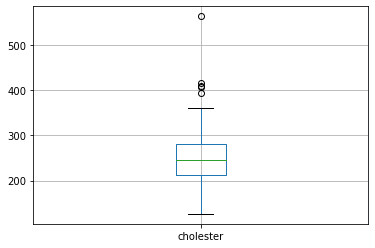

In [15]:
df.boxplot(column='cholester')

In [16]:
df.fillna({'cholester':df['cholester'].median(), 'pression':df['pression'].mean(), 'angine':'non'},inplace=True)

In [17]:
df

,age,sexe,pression,cholester,sucre,electro,taux_max,angine,depression,pic,vaisseau,coeur
0,58,masculin,100.000000,234.0,A,A,156,non,1,1,B,presence
1,41,feminin,131.261194,204.0,A,C,172,non,14,1,A,absence
2,58,masculin,150.000000,270.0,A,C,111,oui,8,1,A,presence
3,53,masculin,140.000000,203.0,B,C,155,oui,31,3,A,presence
4,41,masculin,130.000000,214.0,A,C,168,non,20,2,A,absence
...,...,...,...,...,...,...,...,...,...,...,...,...
265,62,feminin,140.000000,268.0,A,C,160,non,36,3,C,presence
266,62,masculin,130.000000,231.0,A,A,146,non,18,2,D,absence
267,64,masculin,110.000000,211.0,A,C,144,oui,18,2,A,absence
268,63,feminin,150.000000,407.0,A,C,154,non,40,2,D,presence


In [18]:
df.isna().sum()

age           0
sexe          0
pression      0
cholester     0
sucre         0
electro       0
taux_max      0
angine        0
depression    0
pic           0
vaisseau      0
coeur         0
dtype: int64

Normalisation des variables quantitatives

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
v_num = df.select_dtypes(exclude=object)

In [21]:
v_num.drop("pic",axis=1,inplace=True)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [22]:
v_num

,age,pression,cholester,taux_max,depression
0,58,100.000000,234.0,156,1
1,41,131.261194,204.0,172,14
2,58,150.000000,270.0,111,8
3,53,140.000000,203.0,155,31
4,41,130.000000,214.0,168,20
...,...,...,...,...,...
265,62,140.000000,268.0,160,36
266,62,130.000000,231.0,146,18
267,64,110.000000,211.0,144,18
268,63,150.000000,407.0,154,40


In [23]:
from warnings import filterwarnings
filterwarnings('ignore')

In [24]:
normalise=StandardScaler()
v_num[v_num.columns] = normalise.fit_transform(v_num)

In [25]:
v_num

,age,pression,cholester,taux_max,depression
0,0.392278,-1.759222,-0.301507,0.273420,-0.831083
1,-1.477460,0.000000,-0.883263,0.965378,0.306188
2,0.392278,1.054525,0.396599,-1.672713,-0.218706
3,-0.157645,0.491776,-0.902655,0.230172,1.793389
4,-1.477460,-0.070974,-0.689345,0.792388,0.831083
...,...,...,...,...,...
265,0.832217,0.491776,0.357816,0.446409,2.230801
266,0.832217,-0.070974,-0.359683,-0.159054,0.656118
267,1.052186,-1.196472,-0.747520,-0.245549,0.656118
268,0.942201,1.054525,3.053284,0.186925,2.580731


In [26]:
df.drop("coeur",axis=1,inplace=True)

In [27]:
v_cat = df.select_dtypes(object)

In [28]:
v_cat

,sexe,sucre,electro,angine,vaisseau
0,masculin,A,A,non,B
1,feminin,A,C,non,A
2,masculin,A,C,oui,A
3,masculin,B,C,oui,A
4,masculin,A,C,non,A
...,...,...,...,...,...
265,feminin,A,C,non,C
266,masculin,A,A,non,D
267,masculin,A,C,oui,A
268,feminin,A,C,non,D


In [34]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [29]:
v_cat["sexe"].replace({'masculin':1,'feminin':0},inplace=True)
v_cat["sucre"].replace({'A':0,'B':1},inplace=True)
v_cat["angine"].replace({'non':0,'oui':1},inplace=True)
v_cat["electro"].replace({'A':0,'B':1,'C':2},inplace=True)
v_cat["vaisseau"].replace({'A':0,'B':1,'C':2,'D':3},inplace=True)

In [30]:
v_cat

,sexe,sucre,electro,angine,vaisseau
0,1,0,0,0,1
1,0,0,2,0,0
2,1,0,2,1,0
3,1,1,2,1,0
4,1,0,2,0,0
...,...,...,...,...,...
265,0,0,2,0,2
266,1,0,0,0,3
267,1,0,2,1,0
268,0,0,2,0,3


In [38]:
onehotencoder= OneHotEncoder(sparse=True)

In [41]:
onehotencoder.fit_transform(v_cat[['electro','vaisseau']])